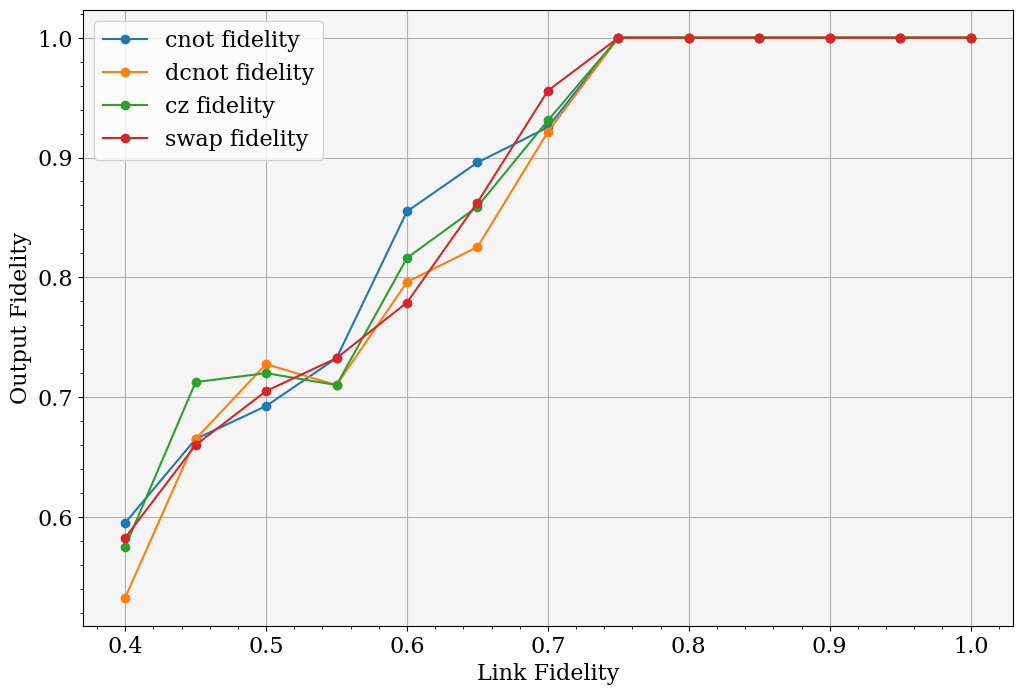

In [2]:
import json
import matplotlib
import matplotlib.pyplot as plt
#print(matplotlib.font_manager.get_font_names())

matplotlib.rcParams['font.family'] = 'DejaVu Serif'

import numpy as np
from scipy.interpolate import griddata

link_fidelity_file = "..//results//link_fidelity_results_three_nodes.json" # "..//results//link_fidelity_results_three_nodes.json"

link_fidelity_data = None
with open("..//results//link_fidelity_results.json", "r") as file:
    link_fidelity_data = json.load(file)

def plot_fidelity_data(data):
    plt.figure(figsize=(12, 8))

    for operation in ['cnot', 'dcnot', 'cz', 'swap']:
        x = []
        y_fidelity = []
        
        for key, value in data.items():
            if operation in value:
                x.append(float(key))
                y_fidelity.append(value[operation]['fidelity'])
                
        plt.plot(x, y_fidelity, marker='o', label=f"{operation} fidelity")
        #plt.title("Link Fidelity Results")
        plt.xlabel("Link Fidelity", fontsize=16)
        plt.ylabel("Output Fidelity", fontsize=16)
        ax = plt.gca()
        ax.set_facecolor('whitesmoke')
        plt.minorticks_on()
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.tick_params(axis='both', which='minor', labelsize=16)
        plt.legend(fontsize=16)
        plt.grid(True)

    plt.show()

plot_fidelity_data(link_fidelity_data)


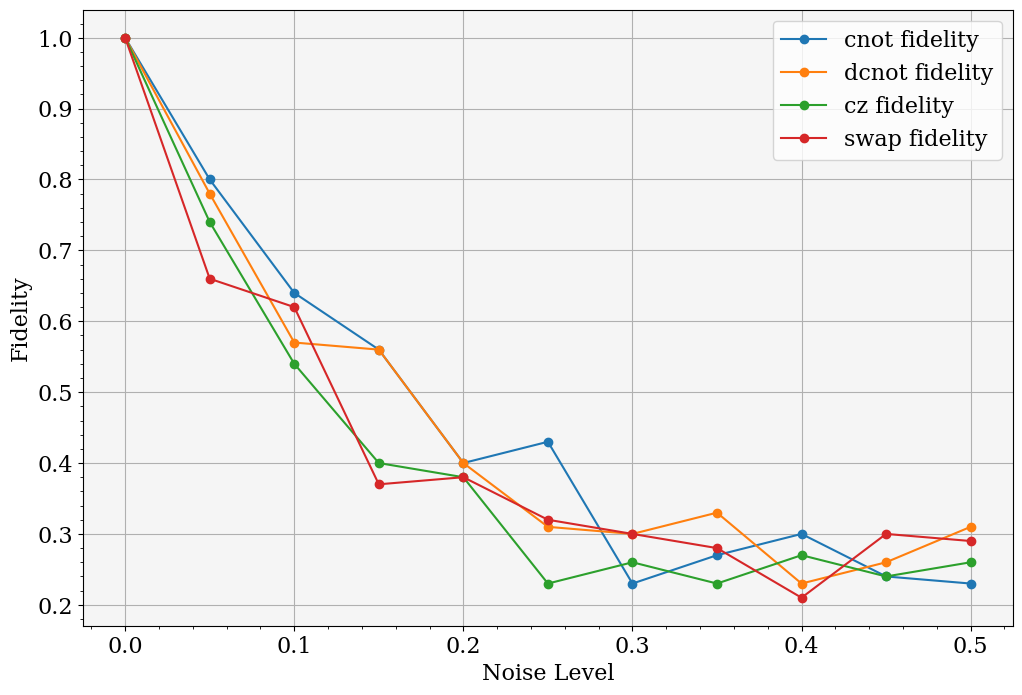

In [2]:
def plot_noise_data(data):
    plt.figure(figsize=(12, 8))

    for operation in ['cnot', 'dcnot', 'cz', 'swap']:
        x = []
        y_fidelity = []
        y_trace_distance = []

        for key, value in data.items():
            if operation in value:
                x.append(float(key))
                y_fidelity.append(value[operation]['fidelity'])

        plt.plot(x, y_fidelity, marker='o', label=f"{operation} fidelity")
        #plt.title("Noisy Quantum Device Results")
        plt.xlabel("Noise Level", fontsize=16)
        plt.ylabel("Fidelity", fontsize=16)
        ax = plt.gca()
        ax.set_facecolor('whitesmoke')
        plt.minorticks_on()
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.tick_params(axis='both', which='minor', labelsize=16)
        plt.legend(fontsize=16)
        plt.grid(True)
    plt.show()

qdevice_noise_data = None
with open("..//results//qdevice_noise_results_three_nodes.json", "r") as file:
    qdevice_noise_data = json.load(file)
plot_noise_data(qdevice_noise_data)


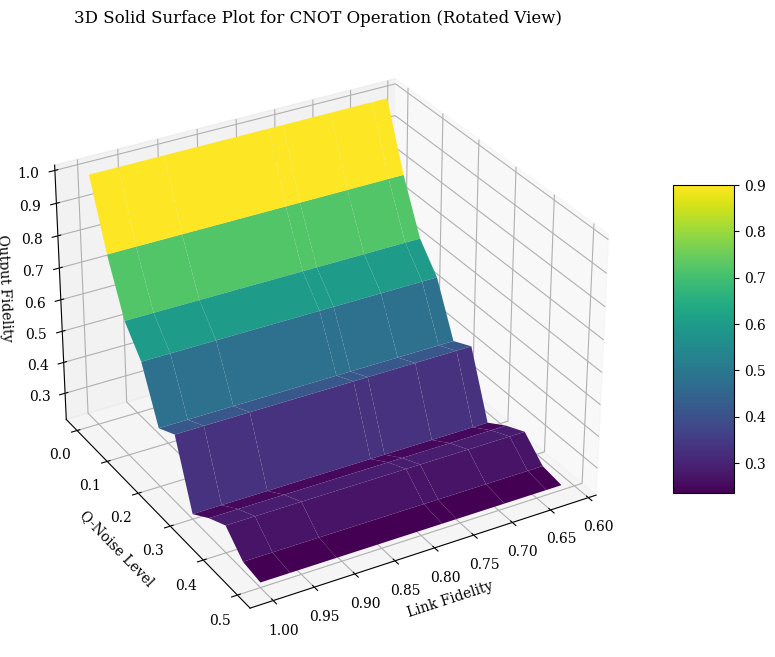

In [3]:
# Adjusting the 3D solid surface plot to provide a different perspective for 'cnot' operation

def plot_3d_cnot_solid_rotated(link_data, noise_data):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    operation = 'cnot'
    link_fidelities = []
    noise_levels = []
    noise_fidelities = []

    # Extracting data for 'cnot' operation from both datasets
    for link_key, link_values in link_data.items():
        if operation in link_values:
            for noise_key, noise_values in noise_data.items():
                if operation in noise_values:
                    link_fidelities.append(link_values[operation]['fidelity'])
                    noise_levels.append(float(noise_key))
                    noise_fidelities.append(noise_values[operation]['fidelity'])

    # Converting lists to numpy arrays for surface plot
    link_fidelities = np.array(link_fidelities)
    noise_levels = np.array(noise_levels)
    noise_fidelities = np.array(noise_fidelities)

    # Creating a grid for the surface plot
    X, Y = np.meshgrid(np.unique(link_fidelities), np.unique(noise_levels))
    Z = griddata((link_fidelities, noise_levels), noise_fidelities, (X, Y), method='linear')

    # Plotting the solid surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    ax.set_xlabel('Link Fidelity')
    ax.set_ylabel('Q-Noise Level')
    ax.set_zlabel('Output Fidelity')
    ax.set_title(f'3D Solid Surface Plot for {operation.upper()} Operation (Rotated View)')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    # Rotating the plot for a different view
    ax.view_init(elev=30, azim=60)  # Adjust elevation and azimuthal angle for a new perspective

    plt.show()

# Plotting the rotated 3D solid surface data for 'cnot'
plot_3d_cnot_solid_rotated(link_fidelity_data, qdevice_noise_data)
